# SCRIPT DESCRIPTION

# IMPORTING LIBRARIES

In [1]:
# Please check to ensure that all of the libraries imported in functions_speller_analysis_simulated.py are installed
# in your environment or in the same file pathway. 
import functions_speller_analysis_online_detections


# INPUTTING PARAMETERS

In [2]:
"""
DESCRIPTION:
Please input the parameters below.
"""

# EXPERIMENTER INPUTS:
block_id             = 'Block2'
date                 = '2023_02_09'
dir_bci2000_data     = '/mnt/shared/ecog/'
dir_clickdetections  = '../../../Alignment/SourceData/ClickDetections/' 
dir_handtrajectories = '../../../Alignment/SourceData/HandTrajectories/' 
dir_onsetsoffsets    = '../../../Alignment/SourceData/MovementOnsetsAndOffsets/'
dir_intermediates    = '/mnt/shared/danprocessing/Projects/PseudoOnlineTests_for_RTCoG/Intermediates/'
# dir_save_latencies   = '../../MainFigures/SourceData/ClickLatencies/'
dir_save_latencies   = '../../SupplementaryFigures/SourceData/ClickLatencies/'
patient_id           = 'CC01'
task                 = 'Speller' 

"""
INPUT VARIABLES:
block_id:             [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:                 [string (YYYY_MM_DD)]; Date on which the block was run.
dir_clickdetections:  [string]; Directory where the click information is stored.
dir_handtrajectories: [string]; Directory where the hand trajectories are stored.
dir_intermediates:    [string]; Intermediates directory where relevant information is stored.
dir_onsetsoffsets:    [string]; Directory where the dictionaries of movement onsets and offset times are stored.
dir_save_latencies:   [string]; Directory where the click latencies will be saved.
patient_id:           [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:                 [string]; Type of task that was run.
""";

# LOADING BCI2000 ClICK INFORMATION

In [3]:
"""
DESCRIPTION:
Loading the matlab file from which the ControlClick state will be extracted. Loading the file from the following local
pathway:

dir_bci2000_data + patient_id + '/mat/' + date + '/' + task + '_Adjusted_' + block_id + '.mat'

Feel free to modify the pathway in which this .mat file is stored and the necessary experimenter inputs appropriately.

INPUT VARIABLES:
block_id:         [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:             [string (YYYY_MM_DD)]; Date on which the block was run.
dir_bci2000_data: [string]; Directory where the BCI2000 data is stored.
patient_id:       [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:             [string]; Type of task that was run.

OUTPUT VARIABLES:
click_info_bci2k: [xarray (time samples, ) > ints (0 or 1)]; Xarray of ControlClick state at each time sample. Time
                  dimension is in units of seconds.
"""

# COMPUTATION:

# Loading the click information from BCI2000.
click_info_bci2k = functions_speller_analysis_online_detections.load_bci2000_clicks(block_id, date, dir_bci2000_data,\
                                                                                    patient_id, task)


# LOADING MEDIAPIPE HAND LANDMARK TRAJECTORIES

In [4]:
"""
DESCRIPTION:
Importing the xarray of hand trajectories. Note that these were previously curtailed according to the true block 
starting and ending times (see curtailing_video_data.ipynb). 

INPUT VARIABLES:  
block_id:             [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:                 [string (YYYY_MM_DD)]; Date on which the block was run.
dir_handtrajectories: [string]; Directory where the hand trajectories are stored.

OUTPUT VARIABLES:
hand_trajectories: [xarray (landmarks, time samples) > floats]; The time traces of the x- and y-coordinates for each 
                   hand landmark. The time domain is in units of seconds. 
"""

# COMPUTATION:

# Loading the hand trajectories.
hand_trajectories = functions_speller_analysis_online_detections.load_hand_trajectories(block_id, date,\
                                                                                        dir_handtrajectories)
  

HAND TRAJECTORIES ARRAY
<xarray.DataArray (landmarks: 42, time_seconds: 17346)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.13827655, -0.13827655, -0.13827655, ..., -0.15090543,
        -0.15090543, -0.15090543],
       ...,
       [ 0.60320641,  0.60320641,  0.60320641, ...,  0.62374245,
         0.62575453,  0.62575453],
       [ 0.43286573,  0.43286573,  0.43286573, ...,  0.39839034,
         0.39839034,  0.39839034],
       [ 0.71142285,  0.71142285,  0.71142285, ...,  0.73038229,
         0.73440644,  0.73440644]])
Coordinates:
  * landmarks     (landmarks) object 'WRIST_x' 'WRIST_y' ... 'PINKY_TIP_y'
  * time_seconds  (time_seconds) float64 7.117 7.133 7.15 ... 296.2 296.2 296.2

HAND LANDMARKS LIST:
['WRIST_x',
 'WRIST_y',
 'THUMB_CMC_x',
 'THUMB_CMC_y',
 'THUMB_MCP_x',
 'THUMB_MCP_y',
 'THUMB_IP_x',
 'THUMB_IP_y',

# LOADING USER-INTERFACE CLICK INFORMATION

In [5]:
"""
DESCRIPTION:
Loading the click information dictionary. Note that these arrays were previously curtailed according to the true block
starting and ending times (see curtailing_video_data.ipynb). 

INPUT VARIABLES:
block_id:            [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:                [string (YYYY_MM_DD)]; Date on which the block was run.
dir_clickdetections: [string]; Directory where the click information is stored.


OUTPUT VARIABLES:
click_info_ui: [dict (key: string ('backspace','keyboard','stimcolumn'); Value: xarray (time samples,) > strings)]; For 
               each time sample of the array of each key there is a 'no_click' or a string specific to that array. For
               example, the 'backspace' key of the dictionary has an array where each element is a string named either
               'no_click' or 'backspace_click'. The 'backspace_click' elements do not occur consecutively and describe
               the instance a click on the backspace key occured. For the 'keyboard' and 'stimcolumn' keys, similar 
               rules apply. Time dimension is in units of s.
"""

# COMPUTATION:

# Loading the click information from the user-interface.
click_info_ui = functions_speller_analysis_online_detections.load_click_information(block_id, date, dir_clickdetections)


# PLOTTING UPPER-LIMB TRAJECTORIES AND CLICK ACTIVITY FROM PARTICIPANT'S MONITOR

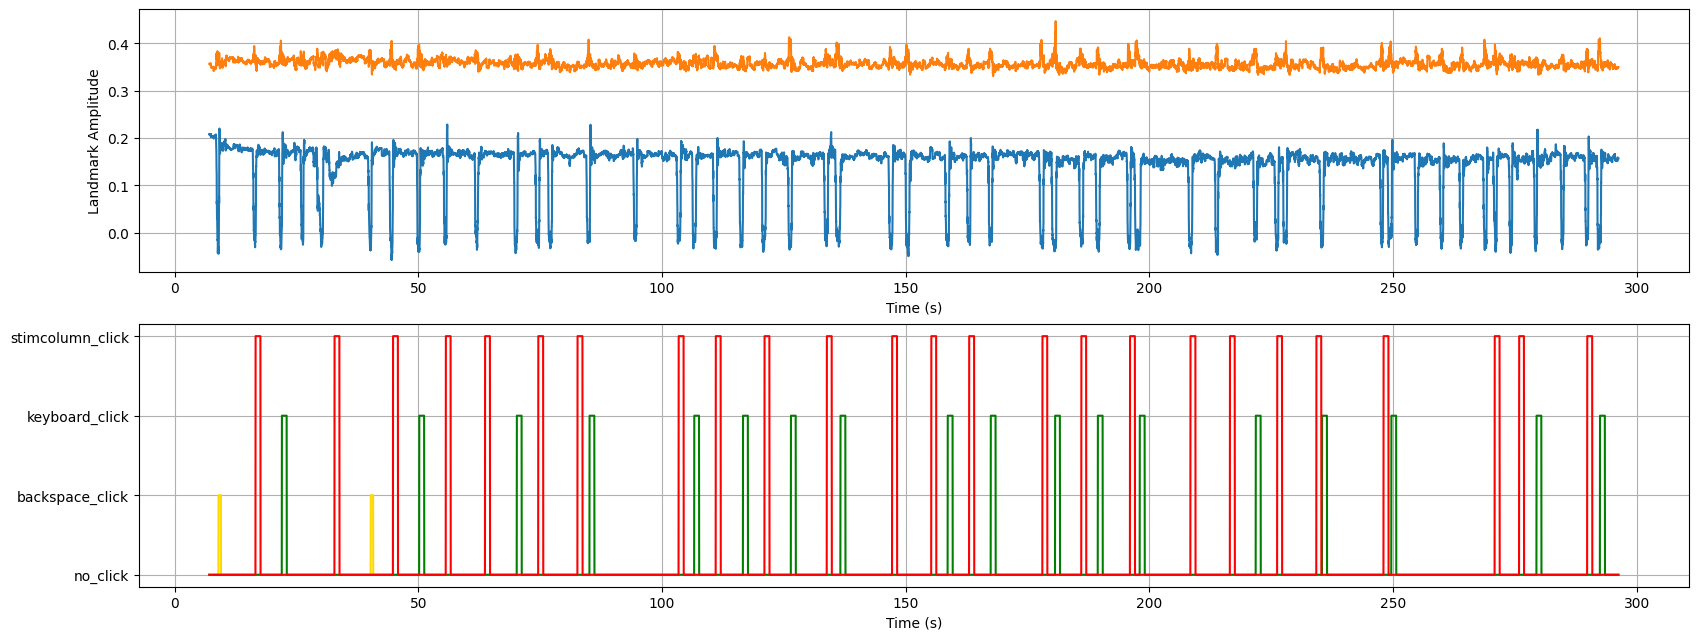

In [6]:
"""
DESCRIPTION:
The experimenter can choose to display whichever set of the above-displayed hand landmarks and inputs these into the 
landmark_trajectories_plotting list.
"""

# EXPERIMENTER INPUTS:
landmark_trajectories_plotting = ['MIDDLE_FINGER_TIP_x', 'THUMB_MCP_y']

"""
INPUT VARIABLES:
click_info_ui:                  [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
    data:                       [xarray (time samples,) > strings];  For each time sample of the array of each key there
                                is a 'no_click' string or a click-string specific to that xarray. For example, the 
                                'backspace' key of the dictionary has an array where each element is a string named
                                either 'no_click' or 'backspace_click'. The 'backspace_click' elements do not occur 
                                consecutively and describe the instance a click on the backspace key occured. For the
                                'keyboard' and 'stimcolumn' keys, similar rules apply. Time dimension is in units of s.
    plotcolor:                  [string]; Color corresponding to the type of click for plotting.
hand_trajectories_ref:          [xarray (landmarks x time samples) > floats]; The trajectories of the x- and y-
                                coordinates for each landmark. These are referenced in the x- and y-dimensions according
                                to the reference landmarks. The time dimension is in units of seconds. 
landmark_trajectories_plotting: [list > strings]; Possible landmarks to display.
"""

# COMPUTATION:

# Plotting hand landmarks and click information.
functions_speller_analysis_online_detections.plotting_landmarks_and_clicks(click_info_ui, hand_trajectories,\
                                                                           landmark_trajectories_plotting)


# REFERENCING HAND TRAJECTORY DATA TO PINKY AND THUMB LANDMARKS

In [7]:
"""
DESCRIPTION:
Each hand landmark is referenced according to experimenter-specified landmarks. Make sure that the landmarks that are
selected will not be used for further analysis as they will get normalized out to 0.
"""

# EXPERIMENTER INPUT:
ref1_x = 'PINKY_MCP_x'
ref2_x = 'THUMB_MCP_x'
refa_y = 'THUMB_MCP_y'
refb_y = 'THUMB_TIP_y'

"""
INPUT VARIABLES:
hand_trajectories: [xarray (landmarks, time samples) > floats]; The time traces of the x- and y-coordinates for each 
                   hand landmark. The time domain is in units of seconds. 
ref1_x:            [string]; First horizontal reference landmark
ref2_x:            [string]; Second horizontal reference landmark
refa_y:            [string]; First vertical reference landmark
refb_y:            [string]; Second vertical reference landmark

OUTPUT VARIABLES:
hand_trajectories_ref: [xarray (landmarks, time samples) > floats]; The trajectories of the x- and y-coordinates for 
                       each hand landmark. These are referenced in the x- and y-dimensions according to the reference 
                       landmarks. The time domain is in units of seconds. 
"""

# COMPUTATION:

# Normalizing hand trajectories.
hand_trajectories_ref = functions_speller_analysis_online_detections.referencing_hand_trajectories(hand_trajectories,\
                                                                                                   ref1_x, ref2_x,\
                                                                                                   refa_y, refb_y)


# PLOTTING REFERENCED UPPER-LIMB TRAJECTORIES AND CLICK ACTIVITY FROM PARTICIPANT'S MONITOR

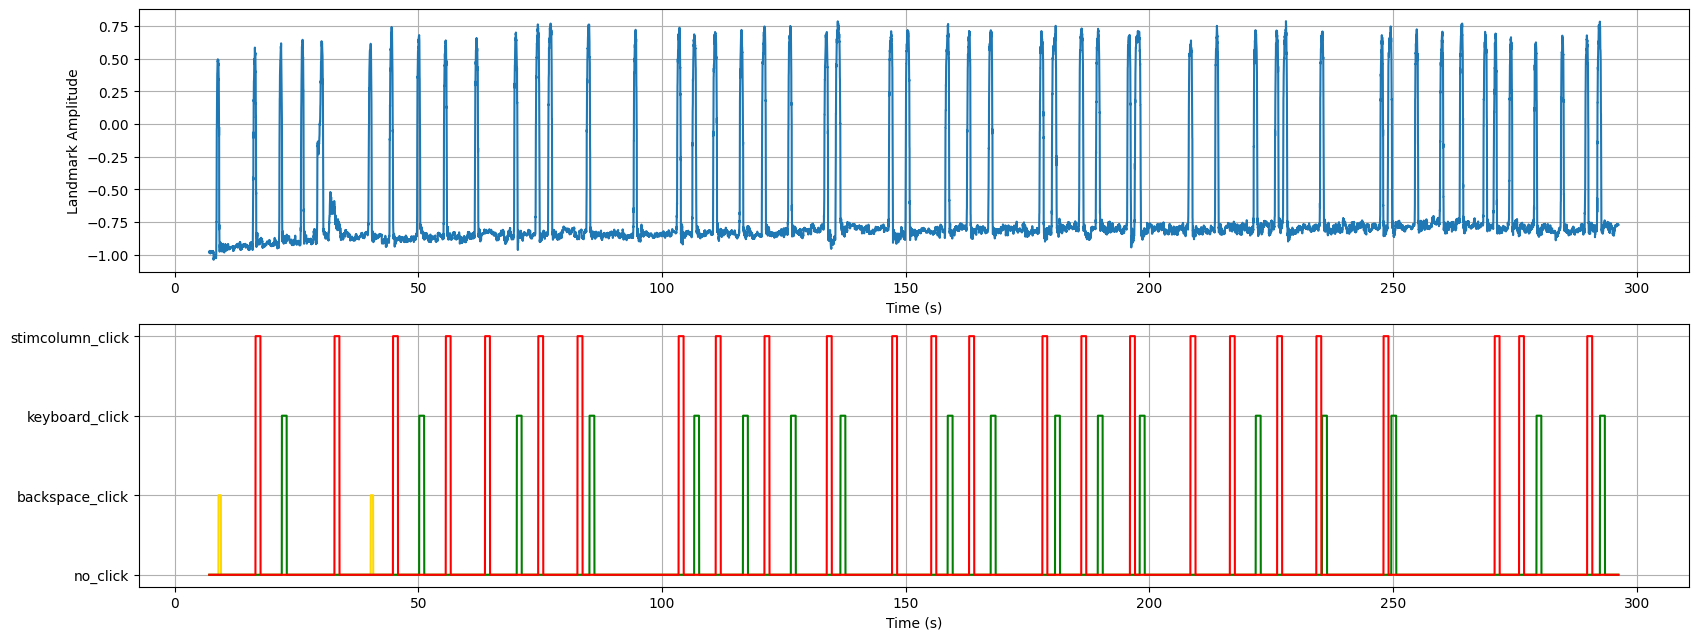

In [8]:
"""
DESCRIPTION:
The experimenter can choose to display whichever set of the above-displayed hand landmarks and inputs these into the 
landmark_trajectories_plotting list.
"""

# EXPERIMENTER INPUTS:
landmark_trajectories_plotting = ['MIDDLE_FINGER_TIP_y']

"""
INPUT VARIABLES:
click_info_ui:                  [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
    data:                       [xarray (time samples,) > strings];  For each time sample of the array of each key there
                                is a 'no_click' string or a click-string specific to that xarray. For example, the 
                                'backspace' key of the dictionary has an array where each element is a string named
                                either 'no_click' or 'backspace_click'. The 'backspace_click' elements do not occur 
                                consecutively and describe the instance a click on the backspace key occured. For the
                                'keyboard' and 'stimcolumn' keys, similar rules apply. Time dimension is in units of s.
    plotcolor:                  [string]; Color corresponding to the type of click for plotting.
hand_trajectories_ref:          [xarray (landmarks x time samples) > floats]; The trajectories of the x- and y-
                                coordinates for each landmark. These are referenced in the x- and y-dimensions according
                                to the reference landmarks. The time dimension is in units of seconds. 
landmark_trajectories_plotting: [list > strings]; Possible landmarks to display.
"""

# COMPUTATION:

# Plotting hand landmarks and click information.
functions_speller_analysis_online_detections.plotting_landmarks_and_clicks(click_info_ui, hand_trajectories_ref,\
                                                                           landmark_trajectories_plotting)


# EXTRACTING ONLY RELEVANT TRAJECTORIES

In [9]:
"""
DESCRIPTION:
For each movement type, the experimenter enters the most relevant hand landmarks for visualization. The experimenter
creates a relevant_hand_landmarks dictionary where the keys of the dictionary are the possible movement classes and the
value for each key is a list of the most relevant hand landmarks for that class. The plotting cells above should be used
to determine these landmarks. Then for each movement type a dictionary, hand_trajectories_relevant is created where for
each movement, only the relevant hand trajectories are stored.
"""

# EXPERIMENTER INPUTS:
relevant_hand_landmarks = {
                           'grasp': ['MIDDLE_FINGER_MCP_x',\
                                     'MIDDLE_FINGER_MCP_y',\
                                     'MIDDLE_FINGER_PIP_x',\
                                     'MIDDLE_FINGER_PIP_y',\
                                     'MIDDLE_FINGER_DIP_x',\
                                     'MIDDLE_FINGER_DIP_y',\
                                     'MIDDLE_FINGER_TIP_x',\
                                     'MIDDLE_FINGER_TIP_y',\
                                     'RING_FINGER_MCP_x',\
                                     'RING_FINGER_MCP_y',\
                                     'RING_FINGER_PIP_x',\
                                     'RING_FINGER_PIP_y',\
                                     'RING_FINGER_DIP_x',\
                                     'RING_FINGER_DIP_y',\
                                     'RING_FINGER_TIP_x',\
                                     'RING_FINGER_TIP_y']
                            }

"""
INPUT VARIABLES:
hand_trajectories_ref:   [xarray (landmarks, time samples) > floats]; The trajectories of the x- and y-coordinates for 
                         each hand landmark. These are referenced in the x- and y-dimensions according to the reference 
                         landmarks. The time domain is in units of seconds. 
relevant_hand_landmarks: [dictionary (key: string (movement type); Value: list > strings (hand landmarks))]; Each
                         movement holds a list of the most useful landmarks used to detect the corresponding movement 
                         type.
                         
OUTPUT VARIABLES:
hand_trajectories_relevant: [dictionary (Key: string (movement type); Value: xarray (relevant landmarks, time samples)
                            > floats]; For each movement type, only the relevant hand trajectories are stored. The time
                            dimension of each xarray is in units of s.   
"""

# COMPUTATION:

# Extracting only the relevant hand trajectories for each movement.
hand_trajectories_relevant = functions_speller_analysis_online_detections.extracting_relevant_trajectories(hand_trajectories_ref,\
                                                                                                           relevant_hand_landmarks)


# UPLOADING DICTIONARY WITH MOVEMENT ONSET/OFFSET TIMES

In [10]:
"""
DESCRIPTION:
The dictionary containing the movement onset and offset times for each movement type will be uploaded if it exists. This
dictionary would contain the previously saved movement onset/offset times for each movement. 

INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_onsetsoffsets: [string]; Directory where the dictionaries of movement onsets and offset times are stored.

OUTPUT VARIABLES:
movement_onsetsoffsets: [dictionary (key: string (movement); Value: list > list [t_onset, t_offset] > floats)]; The 
                        dictionary containing all movement onset and offset times for each movement type.
"""

# Uploading the dictionary with movement onset and offsets.
movement_onsetsoffsets = functions_speller_analysis_online_detections.upload_movement_onsetsoffsets(block_id, date,\
                                                                                                    dir_onsetsoffsets)


{'grasp': [[8.566666666666666, 9.183333333333334],
           [16.066666666666666, 16.78333333333333],
           [21.45, 22.099999999999998],
           [25.866666666666667, 26.516666666666666],
           [29.21666666666667, 30.566666666666666],
           [39.7, 40.46666666666667],
           [44.083333333333336, 44.88333333333333],
           [49.71666666666667, 50.449999999999996],
           [55.166666666666664, 55.88333333333333],
           [61.56666666666667, 62.35],
           [69.65, 70.38333333333333],
           [74.05, 74.88333333333333],
           [76.61666666666667, 77.46666666666667],
           [84.5, 85.26666666666667],
           [94.1, 94.88333333333333],
           [103.05, 103.86666666666666],
           [106.18333333333334, 107.03333333333333],
           [110.46666666666667, 111.28333333333333],
           [115.86666666666667, 116.68333333333334],
           [120.46666666666667, 121.35],
           [125.83333333333333, 126.68333333333334],
           [133.2333

# ZOOMING IN

Movement:  grasp

Movement Onset Times:  []
Movement Onset Inds:  []

Movement Offset Times:  []
Movement Offset Inds:  []


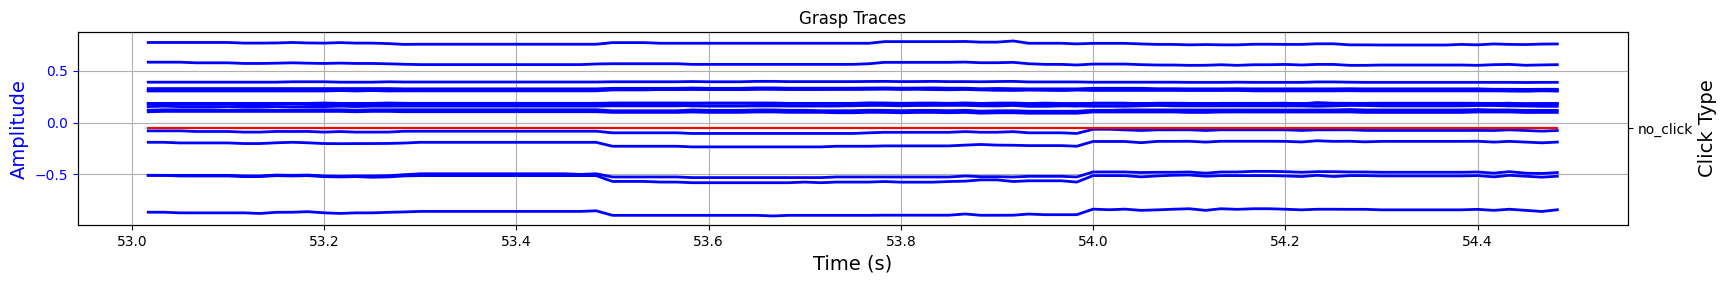

In [11]:
"""
DESCRIPTION:
The experimenter inputs a start and an end time between when to zoom in to view the relevant hand trajectories for each
movement and click information. The hand landmark trajectories are shown for each movement in a separate plot and should
be used to inform determining the movement onset and offset times. If there already exists in the movement onset/offset 
times dictionary onset and offset times within the zoomed-in region for a particular movement, these will also be
displayed as well as their numerical cardinality (as a list).
"""

# EXPERIMENTER INPUTS:
movement_colors = {'grasp': 'blue'}
t_start_zoom    = 53
t_end_zoom      = 54.5

"""
INPUT VARIABLES:
click_info_ui:          [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
    data:               [xarray (time samples,) > strings];  For each time sample of the array of each key there is a 
                        'no_click' string or a click-string specific to that xarray. For example, the 'backspace' key of
                        the dictionary has an array where each element is a string named either 'no_click' or 
                        'backspace_click'. The 'backspace_click' elements do not occur  consecutively and describe the 
                        instance a click on the backspace key occured. For the 'keyboard' and 'stimcolumn' keys, similar
                        rules apply. Time dimension is in units of s.
    plotcolor:          [string]; Color corresponding to the type of click for plotting.
hand_trajectories_ref:  [xarray (landmarks x time samples) > floats]; The trajectories of the x- and y-coordinates for 
                        each landmark. These are referenced in the x- and y-dimensions according to the reference 
                        landmarks. The time dimension is in units of seconds. 
movement_colors:        [dictionary (key: string (movement); Value: string (color))]; There is a color associated with
                        each movement for plotting.
movement_onsetsoffsets: [dictionary (key: string (movement); Value: list > list [t_onset, t_offset] > floats)]; The 
                        dictionary containing all movement onset and offset times for each movement type.
t_end_zoom:             [float (units: s)]; The ending time point for the zoomed in window. To set as the last time
                        point, leave as empty list [].
t_start_zoom:           [float (units: s)]; The starting time point for the zoomed in window. To set as the first time 
                        point, leave as empty list [].    
""";

# Zooming in to the experimenter-specified region.
functions_speller_analysis_online_detections.zooming_in(click_info_ui, hand_trajectories_relevant, movement_colors,\
                                                        movement_onsetsoffsets, t_end_zoom, t_start_zoom)


# COMBINING ALL THREE TYPES OF CLICKS INTO ONE ARRAY

In [12]:
"""
DESCRIPTION:
Combining all click types from the click_info_ui into one array.

INPUT VARIABLES:
click_info_ui: [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
    data:      [xarray (time samples,) > strings];  For each time sample of the array of each key there is a 'no_click'
               string or a click-string specific to that xarray. For example, the 'backspace' key of the dictionary has
               an array where each element is a string named either 'no_click' or 'backspace_click'. The 
               'backspace_click' elements do not occur  consecutively and describe the instance a click on the
               backspace key occured. For the 'keyboard' and 'stimcolumn' keys, similar rules apply. Time dimension is
               in units of s.
    plotcolor: [string]; Color corresponding to the type of click for plotting.

OUTPUT VARIABLES:
clicks_combined_ui: [xarray (N frames, )> strings ('nothing'/'click')]; Xarray containing click information from all 
                    click types.
"""

# COMPUTATION:

# Combining clicks.
clicks_combined_ui = functions_speller_analysis_online_detections.combining_clicks(click_info_ui)


# EXTRACTING CLICK ONSETS FROM BCI2000

In [13]:
"""
DESCRIPTION:
Producing the arrays of click onsets and offsets from BCI2000.

INPUT VARIABLES:
click_info_bci2k: [xarray (time samples, ) > ints (0 or 1)]; Xarray of click states at each time sample. Time dimension
                  is in units of seconds.

NECESSARY FUNCTIONS:
unique_value_index_finder

OUTPUT VARIABLES:
t_click_onsets_bci2k: [array > floats (units: s)]; The times the ControlClick state changes from 0 to 1. 
"""

# COMPUTATION:

# Extracting the click onset times from BCI2000.
t_click_onsets_bci2k,\
_ = functions_speller_analysis_online_detections.extracting_click_onset_offset_times_bci2k(click_info_bci2k)


# EXTRACTING CLICK ONSETS FROM USER-INTERFACE

In [14]:
"""
DESCRIPTION:
Producing the arrays of click onsets and offsets from the user-interface.

INPUT VARIABLES:
clicks_combined_ui: [xarray (N frames, )> strings ('nothing'/'click')]; Xarray containing click information from all 
                    click types.

NECESSARY FUNCTIONS:
unique_value_index_finder

OUTPUT VARIABLES:
t_click_onsets_ui: [array > floats (units: s)]; The times the click changes from no_click to click. 
"""

# COMPUTATION:

# Extracting the click onset times from the user-interface.
t_click_onsets_ui,\
_ = functions_speller_analysis_online_detections.extracting_click_onset_offset_times_ui(clicks_combined_ui)


# COMPUTING SENSITIVITY

In [15]:
"""
DESCRIPTION:
Computing the sensitivity. The sensitivity is defined as the number of true positives over the number of all click 
detections, where a true positive must occur within the experimenter-defined time post-movement onset.
"""
# EXPERIMENTER INPUTS:
movement               = 'grasp'
t_after_movement_limit = 1.5

"""
INPUT VARIABLES:
movement:               [string]; The movement from which the onsets and offsets will be extracted.
movement_onsetsoffsets: [dictionary (key: string (movement); Value: list > list [t_onset, t_offset] > floats)]; The 
                        dictionary containing all movement onset and offset times for each movement type.
t_after_movement_limit: [float (unit: s)]; Amount of time from movement onset that can pass for a click to occur and be
                        associated with the movement onset.
t_click_onsets:         [array > floats (units: s)]; The times the click changes from 0 to 1.

OUTPUT VARIABLES:
sensitivity: [float (units: %)]; Percentage of correctly detected clicks.
"""

# COMPUTATION:

# Computing the sensitivity.
sensitivity = functions_speller_analysis_online_detections.computing_sensitivities(movement, movement_onsetsoffsets,\
                                                                                   t_after_movement_limit,\
                                                                                   t_click_onsets_ui)

Miss:  25.867
Miss:  29.217
Miss:  61.567
Miss:  76.617
Miss:  94.1
Miss:  149.917
Miss:  213.417
Miss:  227.4
Miss:  254.45
Miss:  259.55
Miss:  263.617
Miss:  268.5
Miss:  273.767
Miss:  284.367
Miss:  296.283
Miss:  297.783
Miss:  305.55
Miss:  315.95
Miss:  318.25
Miss:  322.867
Miss:  326.283
Miss:  333.817
Miss:  335.283
Miss:  339.8
Miss:  341.3
Miss:  346.883
Miss:  353.183
Miss:  357.6
Miss:  359.067
Miss:  366.65
Miss:  370.583
Miss:  376.767
Miss:  379.15
Miss:  386.6
Miss:  395.667
Miss:  400.183
Miss:  405.617
Miss:  411.967
Miss:  416.433
Miss:  421.567
Miss:  428.95
Miss:  438.117
Miss:  439.65
Miss:  444.1
Miss:  449.2
Miss:  451.767
Miss:  456.433
Miss:  457.867
Miss:  465.9
Miss:  476.2
Miss:  478.383
Miss:  486.333
Miss:  491.05
Miss:  492.483
Miss:  500.217
Miss:  505.767
Miss:  510.683
Miss:  513.067
Miss:  520.817
Miss:  528.983
Miss:  534.6
Miss:  536.283
Miss:  541.1
Miss:  545.55
Miss:  557.533
Miss:  561.067
Miss:  565.683
Miss:  570.3
Miss:  579.983
Miss:  58

# COMPUTING LATENCIES

Mean Latency to Command:  0.401
Stdev Latency to Command:  0.153
Mean Latency to Command:  0.567
Stdev Latency to Command:  0.154


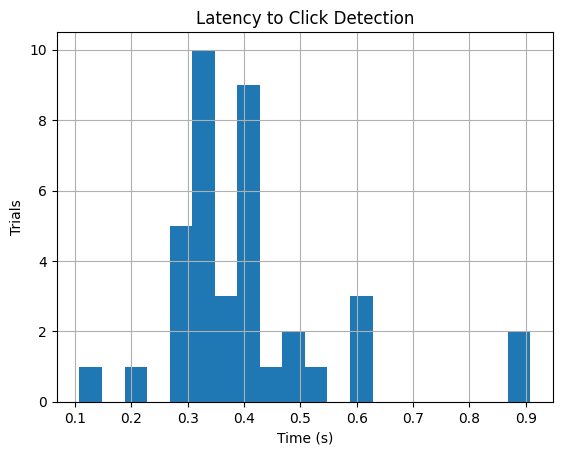

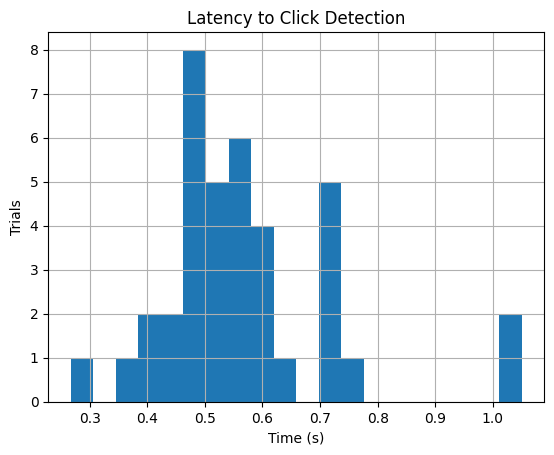

In [16]:
"""
DESCRIPTION:
Computing the latency from movement onset to click detection. 

INPUT VARIABLES:
movement:               [string]; The movement from which the onsets and offsets will be extracted.
movement_onsetsoffsets: [dictionary (key: string (movement); Value: list > list [t_onset, t_offset] > floats)]; The 
                        dictionary containing all movement onset and offset times for each movement type.
t_after_movement_limit: [float (unit: s)]; Amount of time from movement onset that can pass for a click to occur and be
                        associated with the movement onset.
t_click_onsets:         [array > floats (units: s)]; The times the click changes from 0 to 1.

OUTPUT VARIABLES:
t_click_latencies_bci2k: [array > floats (units: s)]; Latencies of all detected clicks in the UI relative to
                         corresponding movement onset.
t_click_latencies_ui:    [array > floats (units: s)]; Latencies of all detected clicks in the UI relative to
                         corresponding movement onset.
                      
"""

# COMPUTATION:

# Computing click latencies for BCI2000 and the user-interface.
t_click_latencies_bci2k = functions_speller_analysis_online_detections.computing_latencies(movement,\
                                                                                           movement_onsetsoffsets,\
                                                                                           t_after_movement_limit,\
                                                                                           t_click_onsets_bci2k);
t_click_latencies_ui = functions_speller_analysis_online_detections.computing_latencies(movement,\
                                                                                        movement_onsetsoffsets,\
                                                                                        t_after_movement_limit,\
                                                                                        t_click_onsets_ui);


# SAVING CLICK LATENCIES

In [17]:
"""
DESCRIPTION:
Saving click latencies for this block to array of latencies from all other blocks recorded on the current date.
"""
# EXPERIMENTER INPUT:
folder_bci2k = 'BCI2000'
folder_ui    = 'UI'

"""
INPUT VARIABLES:
block_id:           [String]; Block ID of the task that was run. Should be format 'Block#'.
date:               [string (YYYY_MM_DD)]; Date on which the current block was run.
dir_save_latencies: [string]; Directory where the click latencies will be saved.
movement:           [string]; The movement from which the onsets and offsets will be extracted.
patient_id:         [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
t_click_latencies:  [array > floats (units: s)]; Latencies of all detected clicks relative to corresponding movement 
                    onset.
task:               [string]; Type of task that was run.
"""

# COMPUTATION:

# Saving the click latencies.
functions_speller_analysis_online_detections.saving_click_latencies(block_id, date, dir_save_latencies, folder_bci2k,\
                                                                    movement, t_click_latencies_bci2k)

functions_speller_analysis_online_detections.saving_click_latencies(block_id, date, dir_save_latencies, folder_ui,\
                                                                    movement, t_click_latencies_ui)




# COMPUTING FALSE POSITIVES

In [18]:
"""
DESCRIPTION:
Counting the number of clicks that occur without any corresponding movement (outside the click limit window). These are
not necessarily the number of false positives. This is because some of these "clicks" may be due to the speller 
highlighter cycling back to the first element in a particular row. Therefore, at the time of each of these independently
occurring "clicks", it is necessary to go back to the video and check whether or not they were actual clicks or simply
caused by the automated highlighting of a row's first element.

INPUT VARIABLES:
movement:               [string]; The movement from which the onsets and offsets will be extracted.
movement_onsetsoffsets: [dictionary (key: string (movement); Value: list > list [t_onset, t_offset] > floats)]; The 
                        dictionary containing all movement onset and offset times for each movement type.
t_after_movement_limit: [float (unit: s)]; Amount of time from movement onset that can pass for a click to occur and be
                        associated with the movement onset.
t_click_onsets:         [array > floats (units: s)]; The times the click changes from 0 to 1. 

OUTPUT VARIABLES:
n_fp: [int]; Total number of false positives for the current block of the session.
"""

# COMPUTATION:

# Computing false positives
n_fp = functions_speller_analysis_online_detections.computing_fp(movement, movement_onsetsoffsets,\
                                                                 t_after_movement_limit,\
                                                                 t_click_onsets_ui)


False Positives?
32.8
63.68
82.65
155.23
216.5
234.23
275.83
